# "Communicate Data Findings" Project: Telling a Pokemon Story!
##                                        by (Argyrios Liatsis)
## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Univariate Analysis</a></li>
    <li><a href="#eda">Bivariate Analysis</a></li>
    <li><a href="#eda">Multivariate Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
    <li><a href="#appendix">Appendix</a></li>
</ul>


## Preliminary Wrangling

> Briefly introduce your dataset here.
This dataset includes 800 Pokemon, in other words, 800 data observations, as well as eleven(11) features, at least one of which is categorical, and last, but not least, this is a tidy dataset (each variable is a column, each observation is a row). All the aforementioned characteristics of this dataset  are in adherence to the minimum requirements for a custom dataset required for this project. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [8]:
#Checking for duplicated values
df.duplicated().sum().any()

False

In [14]:
#Checking for null values
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [34]:
#Renaming columns
df.rename(columns = {'Name': 'name', 'Type 1': 'type_1', 'Type 2': 'type_2', 'Total':'total', 'HP': 'health_points',
                    'Attack':'attack', 'Defense':'defense', 'Sp. Atk':'special_attack', 'Sp. Def':'special_defense',
                    'Speed':'speed', 'Generation':'generation', 'Legendary':'legendary'}, inplace = True) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #                800 non-null    int64 
 1   name             800 non-null    object
 2   type_1           800 non-null    object
 3   type_2           414 non-null    object
 4   total            800 non-null    int64 
 5   health_points    800 non-null    int64 
 6   attack           800 non-null    int64 
 7   defense          800 non-null    int64 
 8   special_attack   800 non-null    int64 
 9   special_defense  800 non-null    int64 
 10  speed            800 non-null    int64 
 11  generation       800 non-null    int64 
 12  legendary        800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


6

During the wrangling process, there existed an initial thought to merge the "type_1" and "type_2" columns, since having two columns for typing 

In [30]:
#df['type'] = df['type_1'].fillna(df['type_2'])
#df['type'] = (df['type_1'].fillna('') + '/' + df['type_2'].fillna('')).str.strip('/')
#df.drop(['type'], axis =1, inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   #                800 non-null    int64   
 1   name             800 non-null    object  
 2   type_1           800 non-null    object  
 3   type_2           414 non-null    object  
 4   total            800 non-null    int64   
 5   health_points    800 non-null    int64   
 6   attack           800 non-null    int64   
 7   defense          800 non-null    int64   
 8   special_attack   800 non-null    int64   
 9   special_defense  800 non-null    int64   
 10  speed            800 non-null    int64   
 11  generation       800 non-null    int64   
 12  legendary        800 non-null    bool    
 13  agility_level    800 non-null    category
dtypes: bool(1), category(1), int64(9), object(3)
memory usage: 77.1+ KB


In [23]:
df['type_1'].sample(5)

424     Ground
462        Bug
587    Psychic
423     Ground
15         Bug
Name: type_1, dtype: object

In [6]:
df1 = df.copy()

In [52]:
df1['type_1'].combine_first(df1['type_2'])

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: type_1, Length: 800, dtype: object

In [45]:
#df1 = pd.DataFrame.combine_first(df['type_2'], inplace = True)

#df1['type'] = df1['type_1'].combine(df1['type2'], (lambda x1, x2: x1 if x2 == '-'))

TypeError: combine_first() got an unexpected keyword argument 'inplace'

In [5]:
#Dual type designation
#df['dual_type'] = np.where(df['Set']=='Z', 'green', 'red')
#df['dual_type'] = ['0' if x == 'Z' else 'green' for x in df['Set']]
df['dual_type'] = df[['type_1, type_2']].apply(lambda x: x[''])
frame[['b','c']].apply(lambda x: x['c'] if x['c']>0 else x['b'], axis=1)

NameError: name 'df1' is not defined

### What is the structure of your dataset?

The dataset of interest includes eleven(11) features, namely "Name", "Type 1", "Type 2", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation, and "Legendary". Approximately half of the values of "Type 2" feature are null, which is intended. 

These are the raw attributes that are used for calculating how much damage a Pokemon move will do . This dataset contains data about the pokemon present in handheld console games (NOT pokemon cards or Pokemon Go).



### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

Most of the feature names are self-explanatory, however providing a brief explanation is the best practice, especially for someone who is not familiar with Pokemon. To elaborate, every Pokemon has a type, with many of them having two types. The type determines how strong they are against pokemon of other types. For instance, a "fire" pokemon has the advantage against a pokemon of "grass" type, whereas it is weak against a pokemon of the "water" type; akin to a rock-paper-scissors case. "HP" stands for "Health Points" which indicates how healthy a pokemon; the more, the merrier. "Sp. Atk" and "Sp. Def" are "Special Attack" and "Special Defense", attributes that 


Most of the features of the dataset are numeric

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?



> The vast majority of features present in this databaset are of interest and shall be put to use to accomplish this project. For instance, one of the insights proposed by a party interested in this project (further details in the "Insights" part of the report) utilizes the "Type 1" and "Type 2" features in combination with the "Speed" feature to find out which types of Pokemon are the fastest. The "Speed" characteristic is important, since Pokemon games are for their vast majority turn-based, thus the pokemon with the highest speed stat always goes first. Suffice it to say, most, if not all features that describe Pokemon characteristics are used for the purpose of this project.



## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
df['Legendary'].value_counts(normalize="true") * 100

False    91.875
True      8.125
Name: Legendary, dtype: float64

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [39]:
df.groupby(['type_1']).describe()

AttributeError: 'list' object has no attribute 'iloc'

In [128]:
#Locating the pokemon with the mos
#df.loc[df['health_points'].idxmin()]
#df[["attack", "health_points"]].max(axis=1)

0       49
1       62
2       82
3      100
4       52
      ... 
795    100
796    160
797    110
798    160
799    110
Length: 800, dtype: int64

In [ ]:
df.loc[df['Value'].idxmax()]

In [66]:
df[['type_1']].apply(pd.value_counts)

,type_1
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Rock,44
Electric,44
Ghost,32
Dragon,32


In [164]:
#Finding which pokemon types are  the most common
df['type_1'].value_counts(normalize=True)*100

Water       14.000
Normal      12.250
Grass        8.750
Bug          8.625
Psychic      7.125
Fire         6.500
Rock         5.500
Electric     5.500
Ghost        4.000
Dragon       4.000
Ground       4.000
Dark         3.875
Poison       3.500
Fighting     3.375
Steel        3.375
Ice          3.000
Fairy        2.125
Flying       0.500
Name: type_1, dtype: float64

In [127]:
#Observing 
df['speed'].describe(percentiles = [.05, .25, .5, .75, .90, .95])

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
5%        25.000000
25%       45.000000
50%       65.000000
75%       90.000000
90%      106.000000
95%      115.000000
max      180.000000
Name: speed, dtype: float64

In [159]:
#Making bins to categorize pokemon speed, then assigning a new categorical feature, along with its values (bin names)
bin_edges = [0,25,45,65,90,106,150,180, np.inf]
bin_names = ['extremely_slow','slow','below_average','above_average','fast','very_fast','extremely_fast', '']
df['agility_level'] = pd.cut(df['speed'], bin_edges, labels=bin_names)
df.drop(['type'], axis=1, inplace=True)

In [161]:
#Testing the new categorical feature
df.query('agility_level == "extremely_fast"')

,#,name,type_1,type_2,total,health_points,attack,defense,special_attack,special_defense,speed,generation,legendary,agility_level
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False,extremely_fast
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,extremely_fast


In [162]:
slow_pokemon = df.query('speed <= 45')

In [163]:
slow_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 789
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   #                205 non-null    int64   
 1   name             205 non-null    object  
 2   type_1           205 non-null    object  
 3   type_2           92 non-null     object  
 4   total            205 non-null    int64   
 5   health_points    205 non-null    int64   
 6   attack           205 non-null    int64   
 7   defense          205 non-null    int64   
 8   special_attack   205 non-null    int64   
 9   special_defense  205 non-null    int64   
 10  speed            205 non-null    int64   
 11  generation       205 non-null    int64   
 12  legendary        205 non-null    bool    
 13  agility_level    205 non-null    category
dtypes: bool(1), category(1), int64(9), object(3)
memory usage: 21.6+ KB


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

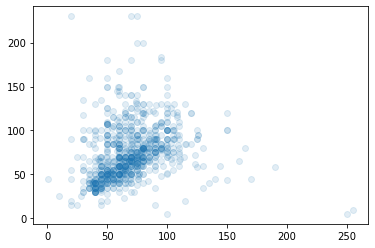

In [75]:
plt.scatter(data = df, x = 'health_points', y = 'defense', alpha = 1/8);

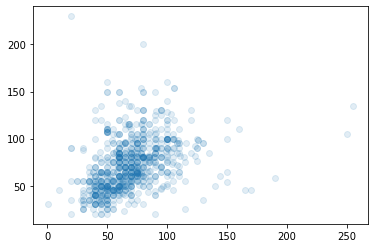

In [79]:
plt.scatter(data = df, x = 'health_points', y = 'special_defense', alpha = 1/8);

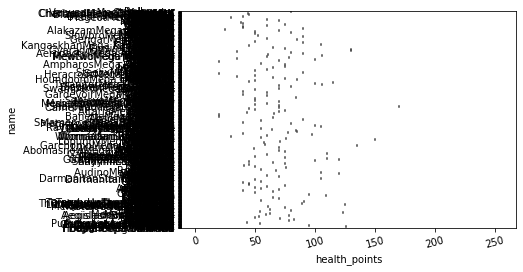

In [82]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'health_points', y = 'name', color = base_color)
plt.xticks(rotation = 15);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
g = sb.FacetGrid(df, col="legendary", )

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!